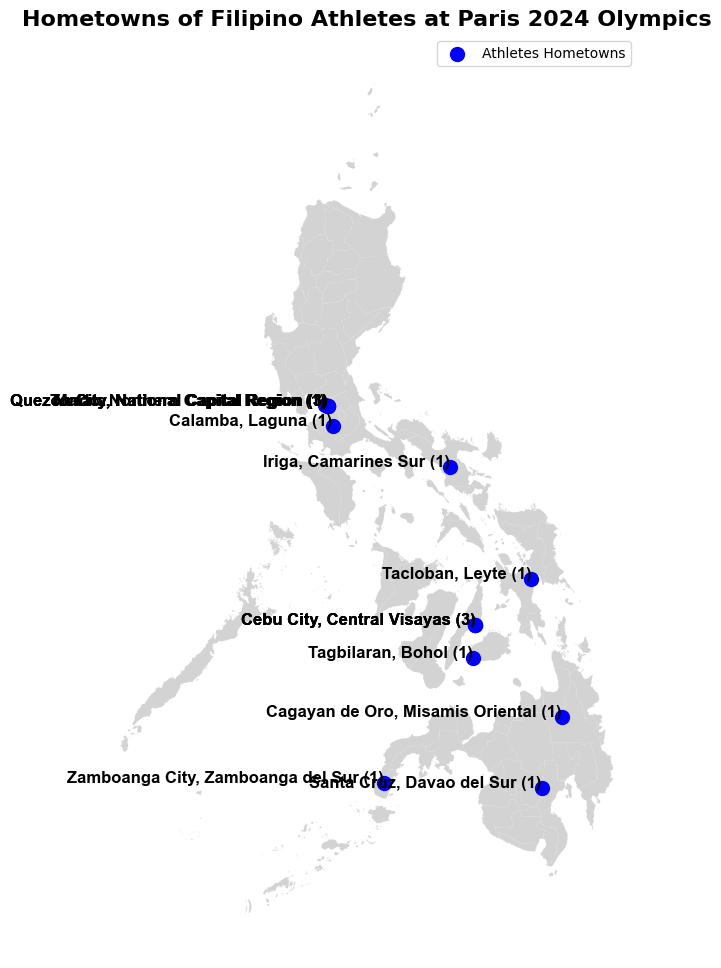

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile of the Philippines
shapefile_path = "C:/Users/tmilagroso/Downloads/pythonProj/gadm41_PHL_shp/gadm41_PHL_1.shp"
gdf = gpd.read_file(shapefile_path)

# Athlete dataset (2 track and field, 3 gymnastics, 2 swimming athletes raised and born outside the country)
athletes_data = [
    {"Name": "EJ Obiena", "Hometown": "Tondo, Northern Capital Region"},  # Raised outside
    {"Name": "Carlo Paalam", "Hometown": "Cagayan de Oro, Misamis Oriental"},
    {"Name": "Eumir Marcial", "Hometown": "Zamboanga City, Zamboanga del Sur"},
    {"Name": "Aira Villegas", "Hometown": "Tacloban, Leyte"},
    {"Name": "Nesthy Petecio", "Hometown": "Santa Cruz, Davao del Sur"},
    {"Name": "Hergie Bacyadan", "Hometown": "Quezon City, National Capital Region"},
    {"Name": "Samantha Catantan", "Hometown": "Quezon City, National Capital Region"},
    {"Name": "Bianca Pagdanganan", "Hometown": "Quezon City, National Capital Region"},
    {"Name": "Dottie Ardina", "Hometown": "Calamba, Laguna"},
    {"Name": "Carlos Yulo", "Hometown": "Malata, National Capital Region"},
    {"Name": "Kiyomi Watanabe", "Hometown": "Cebu City, Central Visayas"},  # Raised outside
    {"Name": "Joanie Delgaco", "Hometown": "Iriga, Camarines Sur"},
    {"Name": "John Ceniza", "Hometown": "Cebu City, Central Visayas"},  # Raised outside
    {"Name": "Elreen Ando", "Hometown": "Cebu City, Central Visayas"},  # Raised outside
    {"Name": "Vanessa Sarno", "Hometown": "Tagbilaran, Bohol"},
]

# Convert the athlete data to a DataFrame
athletes_df = pd.DataFrame(athletes_data)

# Define coordinates for hometowns
def get_coordinates(hometown):
    hometown_coords = {
        "Cagayan de Oro": (125.6, 8.5),
        "Zamboanga City": (122.1, 7.2),
        "Tondo": (120.95, 14.61),  # Add coordinates for Tondo
        "Tacloban": (125.0, 11.2),
        "Santa Cruz": (125.2, 7.1),
        "Quezon City": (121.0, 14.6),
        "Calamba": (121.1, 14.2),
        "Cebu City": (123.9, 10.3),
        "Malata": (121.0, 14.6),
        "Iriga": (123.4, 13.4),
        "Tagbilaran": (123.85, 9.65),
    }
    return hometown_coords.get(hometown.split(",")[0], (None, None))  # Use only the city name for lookup

# Add latitude and longitude columns to the DataFrame
athletes_df[['Longitude', 'Latitude']] = athletes_df['Hometown'].apply(lambda x: pd.Series(get_coordinates(x)))

# Group by hometown and count athletes
hometown_counts = athletes_df['Hometown'].value_counts().reset_index()
hometown_counts.columns = ['Hometown', 'Count']

# Merge counts back into the original dataframe
athletes_df = athletes_df.merge(hometown_counts, on='Hometown')

# Create a GeoDataFrame from the athletes data
athletes_gdf = gpd.GeoDataFrame(athletes_df, geometry=gpd.points_from_xy(athletes_df.Longitude, athletes_df.Latitude))

# Plot the map of the Philippines
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='lightgrey')  # Plot the Philippines map

# Overlay the athlete locations
athletes_gdf.plot(ax=ax, color='blue', markersize=100, label='Athletes Hometowns')

# Add labels for each athlete's hometown with count
for x, y, label, count in zip(athletes_gdf.geometry.x, athletes_gdf.geometry.y, athletes_gdf['Hometown'], athletes_gdf['Count']):
    ax.text(x, y, f"{label} ({count})", fontsize=12, ha='right', color='black', fontweight='bold', fontname='Arial')

# Add text indicating athletes born and raised outside the country
# ax.text(111.0, 11.0, "7 athletes were born and raised outside the Philippines", fontsize=14, ha='center', color='red', fontweight='bold')

# Add title and legend
ax.set_title("Hometowns of Filipino Athletes at Paris 2024 Olympics", fontsize=16, fontweight='bold')
plt.legend()
plt.axis('off')  # Turn off the axis for better visualization
plt.show()